#    Telecom customer churn prediction 

In this project we are going to predict whether the customer will switch the service provider based on a few features. The output is either 'True' or 'False'. Hence this is a classic case of a classification. 

The data will be used for training different models and the accuracy is predicted for each model. Based on the accuracy the inference for the best-fit (model) can be made.

In [116]:
# Importing numpy and pandas libraries.

import numpy as np
import pandas as pd

In [117]:
# Importing pre-processing,LabelEncoder,train_test_split modules from sklearn.

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [118]:
# Importing visualization packages.

import matplotlib.pyplot as plt
from IPython.display import display,HTML
import seaborn as sns

In [131]:
# Loading all classifiers from sklearn.

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC,SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Accuracy and area under the curve are the metrics going to be computed.
from sklearn.metrics import accuracy_score,roc_auc_score


In [132]:
# Reading the raw data and printing the forst 5 rows.

df=pd.read_csv('telecom_data.csv')
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [121]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [133]:
# Dropping a column which adds no value for prediction.

df=df.drop('phone number',axis=1)


In [124]:
# Checking for any null values in each column of the data.

df.isnull().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

As all rows show '0' there is no furhter cleaning required.

In [75]:
print('---- Data Types --- \n',df.dtypes)
print('---- Data type count ---- \n',df.dtypes.value_counts())

---- Data Types --- 
 state                      object
account length              int64
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object
---- Data type count ---- 
 float64    8
int64      8
object     3
bool       1
dtype: int64


In [125]:
# Listing all columns which have only 'boolean' and 'object' data-types.

cat = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['bool','object'] ]

In [77]:


le=preprocessing.LabelEncoder()
for i in cat:
    le.fit(df[i])
    df[i]=le.transform(df[i])

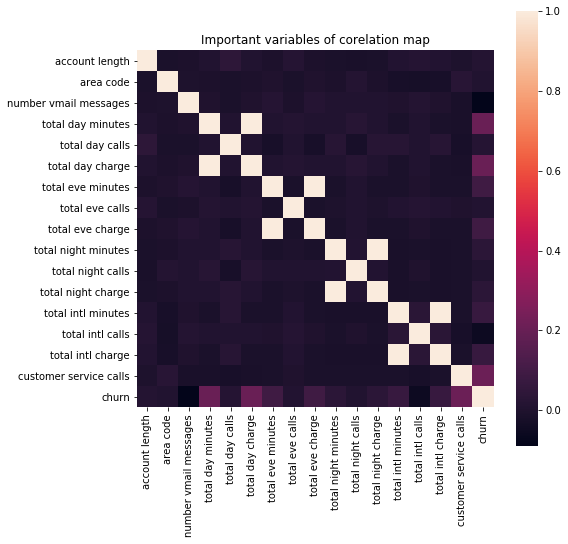

In [126]:
# Generating a co-relation matrix using a heatmap.

corrmat=df.corr(method='pearson')
f,ax=plt.subplots(figsize=(8,8))

sns.heatmap(corrmat, vmax=1., square=True)
plt.title('Important variables of corelation map')
plt.show()

In [79]:
y=df['churn']
df=df.drop(['churn'],axis=1)

In [80]:
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls'],
      dtype='object')

In [128]:
# Splitting the data into training and testing sets.

xtrain, xvalid, ytrain, yvalid = train_test_split(df, y, 
                                                  stratify=y, 
                                                  random_state=42, 
                                                  test_size=0.1, shuffle=True)

In [82]:
print(xtrain.shape, xvalid.shape, ytrain.shape, yvalid.shape)

(2999, 19) (334, 19) (2999,) (334,)


# Model Training

# A) LogisticRegression

In [83]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(C=1.0)
clf.fit(xtrain,ytrain)
predictions=clf.predict(xvalid)
print('accuracy_score',accuracy_score(yvalid,predictions))
print('auc',roc_auc_score(yvalid,predictions))
lr = [clf.__class__,accuracy_score(yvalid,predictions),roc_auc_score(yvalid,predictions)]

accuracy_score 0.8502994011976048
auc 0.5745192307692308


# B) MultinominalNB

In [84]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
mnb = [clf.__class__,accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.6736526946107785
auc 0.653409090909091


# C) AdaBoostClassifier

In [85]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
abc = [clf.__class__,accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.8592814371257484
auc 0.6404428904428904


# D) KNeighborsClassifier

In [86]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
knc = [clf.__class__,accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.8802395209580839
auc 0.6440122377622378


# E) GradientBoostingClassifier

In [87]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
gbc = [clf.__class__,accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.9431137724550899
auc 0.845425407925408


# F) DecisionTreeClassifier

In [88]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(xtrain,ytrain)
predictions=clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid, predictions))
print("auc",roc_auc_score(yvalid, predictions))
dtc = [clf.__class__,accuracy_score(yvalid, predictions),roc_auc_score(yvalid, predictions)]

accuracy_score 0.8712574850299402
auc 0.7514568764568765


# G) ExtraTreesClassifier

In [89]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
clf.fit(xtrain,ytrain)
predictions = clf.predict(xvalid)
print("accuracy_score",accuracy_score(yvalid,predictions))
print("auc",roc_auc_score(yvalid,predictions))
etc = [clf.__class__,accuracy_score(yvalid,predictions),roc_auc_score(yvalid,predictions)]

accuracy_score 0.907185628742515
auc 0.6944201631701632


In [107]:
algo=pd.DataFrame([lr])
algo=algo.append([mnb])
algo=algo.append([abc])
algo=algo.append([knc])
algo=algo.append([gbc])
algo=algo.append([dtc])
algo=algo.append([etc])

In [108]:
print(algo)

                                                   0         1         2
0  <class 'sklearn.linear_model.logistic.Logistic...  0.850299  0.574519
0        <class 'sklearn.naive_bayes.MultinomialNB'>  0.673653  0.653409
0  <class 'sklearn.ensemble.weight_boosting.AdaBo...  0.859281  0.640443
0  <class 'sklearn.neighbors.classification.KNeig...  0.880240  0.644012
0  <class 'sklearn.ensemble.gradient_boosting.Gra...  0.943114  0.845425
0  <class 'sklearn.tree.tree.DecisionTreeClassifi...  0.871257  0.751457
0  <class 'sklearn.ensemble.forest.ExtraTreesClas...  0.907186  0.694420


From the above result we notice that 'Gradient Boosting Classifier' gives us the most accuracy with 94.3%.